# Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records

#### Created by: 
Paz Bunis (pazbunis@gmail.com)
#### based on:
Beata Strack, Jonathan P. DeShazo, Chris Gennings, et al., “Impact of HbA1c
Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database
Patient Records,” BioMed Research International, vol. 2014, 11 pages, 2014.

## 0. Imports and Initialization

In [32]:
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import pandas as pd
import numpy as np
encounters = pd.read_csv('dataset/diabetic_data.csv')

## 1. Descriptive Statistics
### 1.1. Gender vs. other attributes

#### 1.1.1. Gender vs. Age

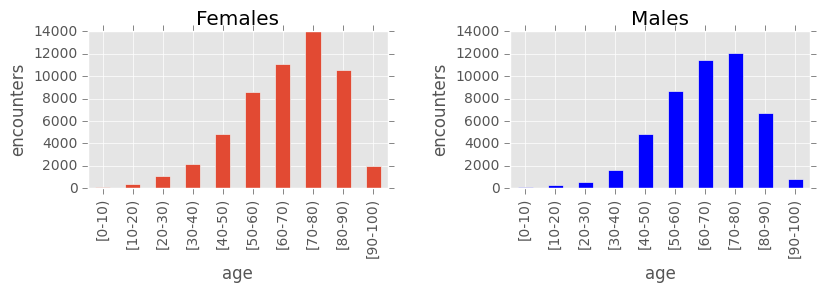

In [225]:
females_age_grouping = encounters[encounters.gender == 'Female'].groupby('age').size()
males_age_grouping = encounters[encounters.gender == 'Male'].groupby('age').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[1].set_ylabel("encounters")
fig.tight_layout(pad=4)
females_age_grouping.plot.bar(ax = axs[0], title = 'Females')
males_age_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.1.2. Gender vs. Race

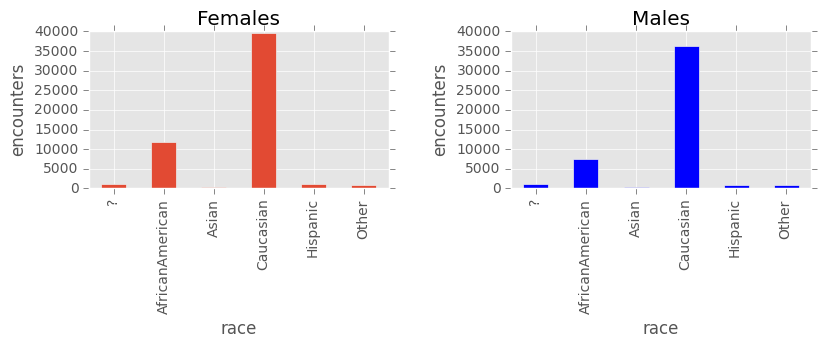

In [226]:
females_race_grouping = encounters[encounters.gender == 'Female'].groupby('race').size()
males_race_grouping = encounters[encounters.gender == 'Male'].groupby('race').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[1].set_ylabel("encounters")
fig.tight_layout(pad=4)
females_race_grouping.plot.bar(ax = axs[0], title = 'Females')
males_race_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.1.3. Gender vs. Readmission Value

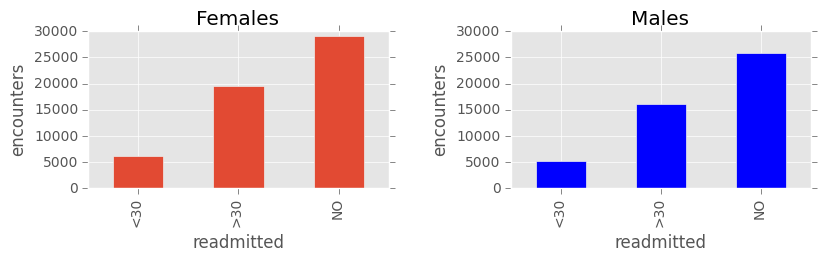

In [227]:
females_readmission_grouping = encounters[encounters.gender == 'Female'].groupby('readmitted').size()
males_readmission_grouping = encounters[encounters.gender == 'Male'].groupby('readmitted').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[1].set_ylabel("encounters")
fig.tight_layout(pad=4)
females_readmission_grouping.plot.bar(ax = axs[0], title = 'Females')
males_readmission_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.1.4. Gender vs. Most Frequently Used ICD-9 Codes
(All three diagnosis types are combined to one column)

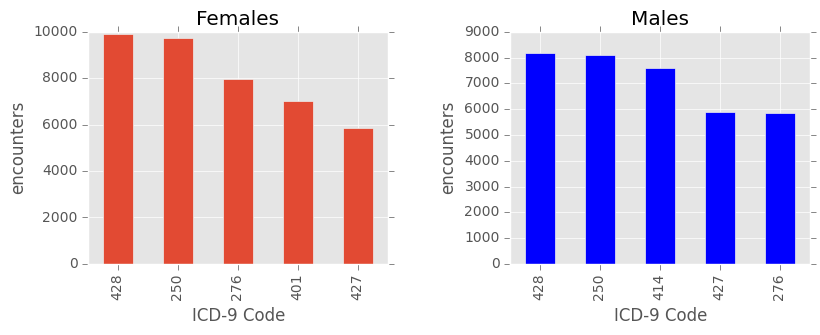

In [224]:
fem_diags_projection = encounters[encounters.gender == 'Female'][['diag_1', 'diag_2', 'diag_3']]
fem_diags_arr = [fem_diags_projection[['diag_1']],fem_diags_projection[['diag_2']],fem_diags_projection[['diag_3']]]
fem_comb_diags = pd.concat(fem_diags_arr, axis=1).stack().reset_index(drop=True)

male_diags_projection = encounters[encounters.gender == 'Male'][['diag_1', 'diag_2', 'diag_3']]
male_diags_arr = [male_diags_projection[['diag_1']],male_diags_projection[['diag_2']],male_diags_projection[['diag_3']]]
male_comb_diags = pd.concat(male_diags_arr, axis=1).stack().reset_index(drop=True)

fig, axs = plt.subplots(1,2, figsize=(9,4))
axs[0].set_ylabel("encounters")
axs[0].set_xlabel("ICD-9 Code")
axs[1].set_ylabel("encounters")
axs[1].set_xlabel("ICD-9 Code")
fig.tight_layout(pad=4)
fem_comb_diags.value_counts().head().plot.bar(ax = axs[0], title = 'Females')
male_comb_diags.value_counts().head().plot.bar(ax = axs[1], title = 'Males', color='b')

### 1.2. Days in Hospital and A1c Test Results

#### 1.2.1. Days in Hospital vs. Gender

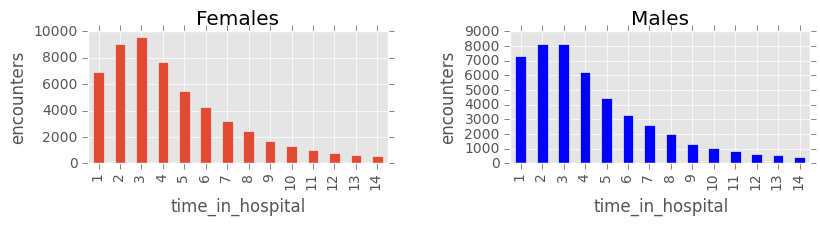

In [221]:
females_hospital_time_grouping = encounters[encounters.gender == 'Female'].groupby('time_in_hospital').size()
males_hospital_time_grouping = encounters[encounters.gender == 'Male'].groupby('time_in_hospital').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[0].set_xlabel("days")
axs[1].set_ylabel("encounters")
axs[1].set_xlabel("days")

fig.tight_layout(pad=4)
females_hospital_time_grouping.plot.bar(ax = axs[0], title = 'Females')
males_hospital_time_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.2.2. A1c test results vs. Gender